In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

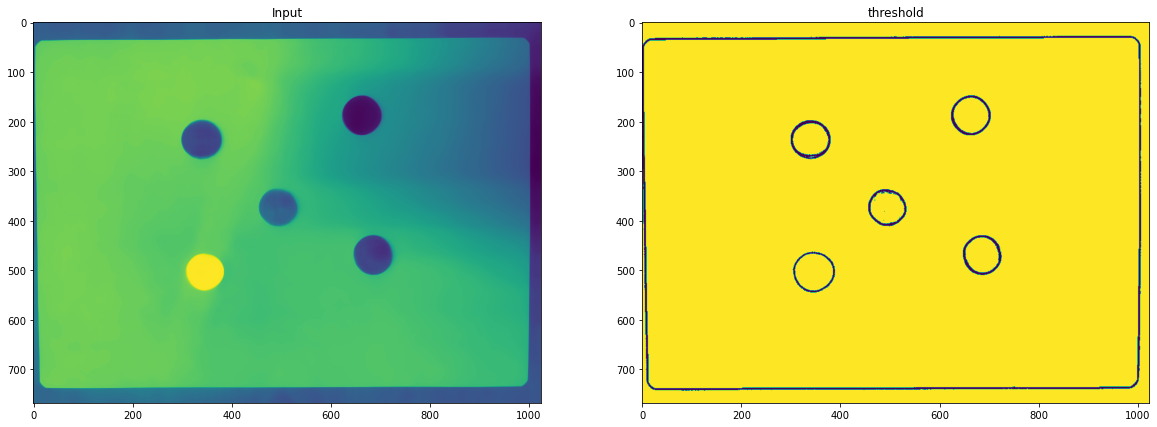

In [3]:
img = cv2.imread('1.jpg')
blur = cv2.medianBlur(img, 25) # 동전의 개수를 세는 것이 목표, 동전 디테일은 상관 없음.
img = cv2.cvtColor(blur, cv2.COLOR_BGR2GRAY)

thresh = cv2.adaptiveThreshold(img ,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2)

plt.figure(figsize=(20, 16))
plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(thresh),plt.title('threshold')
plt.show()

In [4]:
circles = cv2.HoughCircles(thresh, cv2.HOUGH_GRADIENT, 1, 20, param1=50, param2=30, minRadius=0, maxRadius=0)

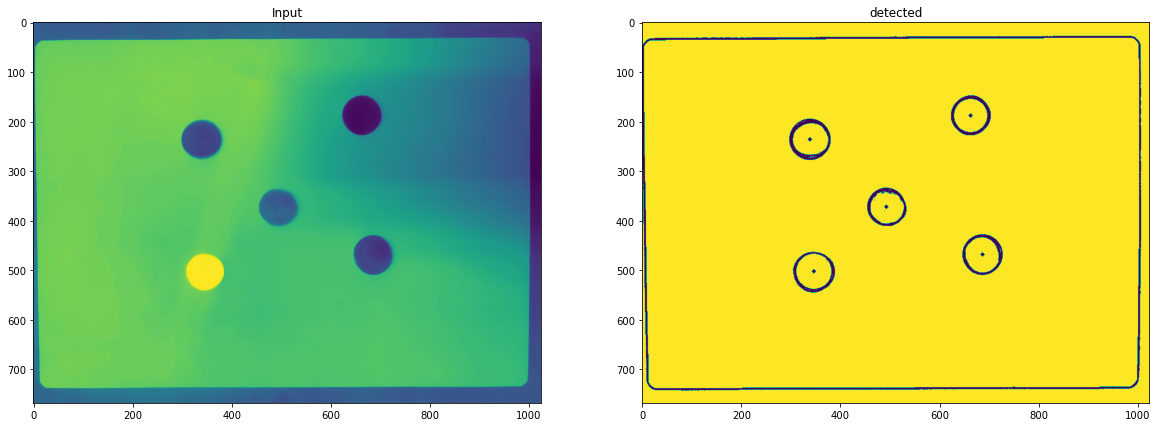

5


In [5]:
circles = np.uint16(np.around(circles))

count = 0

for i in circles[0,:]:
    cv2.circle(thresh, (i[0], i[1]), i[2], (0, 255, 0), 2)
    cv2.circle(thresh,(i[0],i[1]),2,(0,0,255),3)
    count += 1
    
plt.figure(figsize=(20, 16))
plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(thresh),plt.title('detected')
plt.show()
print(count)